# Machine Learning and Deep Mining Spam Email Detection Project

SOFE 4620U - Machine Learning & Data Mining Final Project

---

### Problem Statement

The problem we wish to address is the filtering of spam emails from one's personal email address. Spam is a common issue for most individuals as various sites leak user’s email information to nefarious companies who then “spam” the users email with repetitive and often inappropriate advertisements. Although solutions for this problem already exist, we wish to build an email filtering system with categorization of spam emails to further our understanding of natural language processing and machine learning as a whole. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import enchant
import itertools

from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load and display dataset
df = pd.read_csv("spam_nospam.csv", header=None)
df[:]

,0,1,2
0,CATEGORY,MESSAGE,FILE_NAME
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\r...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,00210.050ffd105bd4e006771ee63cabc59978
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",01178.5c977dff972cd6eef64d4173b90307f0


## Dataset information and statistics
---

In [3]:
# Dataset table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5797 non-null   object
 1   1       5797 non-null   object
 2   2       5797 non-null   object
dtypes: object(3)
memory usage: 136.0+ KB


In [4]:
# Dataset table description and statistics
df.describe()

,0,1,2
count,5797,5797,5797
unique,3,5626,5797
top,0,\r\n\r\nHello I am your hot lil horny toy.\r\n...,FILE_NAME
freq,3900,7,1


In [5]:
# Dataset table shape information
df.shape

(5797, 3)

In [6]:
# Dataset table types information
df.dtypes

0    object
1    object
2    object
dtype: object

In [7]:
# Dataset table columns information
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [8]:
# Rename columns and remove the filename column
df = df.rename(columns={0:"Type", 1:"Message", 2:"Filename"})
df = df.drop(columns={"Filename"})
df = df.drop(0)
df[:]

,Type,Message
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates..."
2,1,ATTENTION: This is a MUST for ALL Computer Use...
3,1,This is a multi-part message in MIME format.\r...
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...
5,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver..."
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\..."
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\..."


In [9]:
# Add length of each message
df["Length"] = df["Message"].apply(len)
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",671
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1373
3,1,This is a multi-part message in MIME format.\r...,7032
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,1188
5,1,This is the bottom line. If you can GIVE AWAY...,1862
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",1016
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,278
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",418
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",1499


<AxesSubplot:xlabel='Type', ylabel='count'>

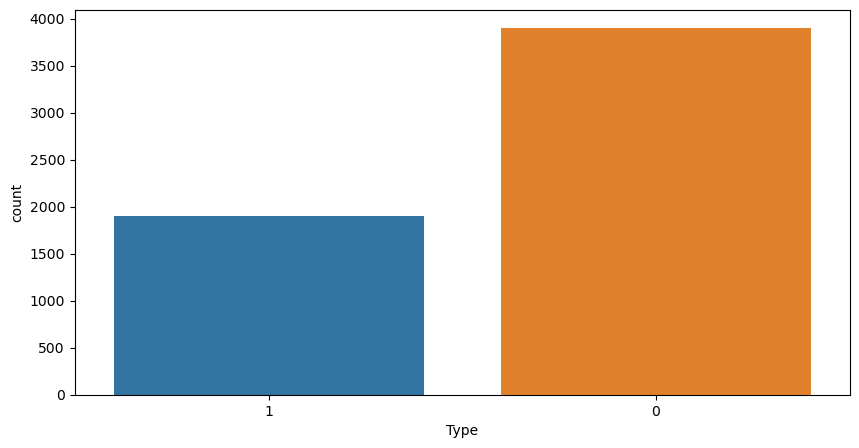

In [10]:
# Plot number of spam vs non-spam messages (1 = spam, 0 = non-spam)
plt.figure(figsize = (10, 5))
x = df.Type.value_counts()
sns.countplot(x = "Type", data = df)

## Cleaning the dataset
---

In [11]:
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",671
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1373
3,1,This is a multi-part message in MIME format.\r...,7032
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,1188
5,1,This is the bottom line. If you can GIVE AWAY...,1862
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",1016
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,278
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",418
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",1499


In [12]:
# Array list containing html related content
html_content_tags = ["html", "body", "head", "footer", "b", "br", "font", "http", "com", "www", "img", "alt", "table", "td", "arial", "helvetica", "sans-serif", "sans serif", "3d", "input", "colspan", "sans", "serif", "div", "text", "align", "type", "p", "margin"]

In [13]:
# Clean html tags and content from messages
clean_html = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|^[0-9a-zA-Z]*=[0-9a-zA-Z\s\D]*"[0-9a-zA-Z\s\D]*"|<[0-9a-zA-Z\s\D]*?>|[0-9]*')

def remove_html_tags(string):
    return clean_html.sub("", string)

# Remove html tags from messages
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words in remove_html_tags(words)))
counter_soup = 1
for message in df["Message"]:
    soup = BeautifulSoup(message)
    text = soup.get_text()
    df.loc[counter_soup, "Message"] = text
    counter_soup = counter_soup + 1
    
df["Length"] = df["Message"].apply(len)

C:\Users\rnlclng.pilar\AppData\Local\Temp\ipykernel_15116\2499453613.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(message)


In [14]:
# Removing punctuation
df["Message"] = df["Message"].str.replace("\W", " ", regex=True)

# Lower casing all letters
df["Message"] = df["Message"].str.lower()

# Remove blank space
df["Message"] = df["Message"].str.replace(r"\s+", " ", regex=True)
df["Message"] = df["Message"].str.replace(r"^\s+|\s*?$", " ", regex=True)

# Remove content transfer strings
df["Message"] = df["Message"].str.replace("content transfer", " ")

df[:]

,Type,Message,Length
1,1,dear homeowner interest rates are at their low...,467
2,1,attention this is a must for all computer user...,1091
3,1,this is a multi part message in mime format co...,824
4,1,important information the new domain names are...,1037
5,1,this is the bottom line if you can give away c...,1579
...,...,...,...
5792,0,i m one of the but it s not working very well ...,817
5793,0,damien morton quoted approves html emotitags n...,234
5794,0,on mon at che wrote thats the correct lines to...,331
5795,0,once upon a time manfred wrote i would like to...,1179


In [15]:
# Removing stop words
stop_words_list = set(stopwords.words("english"))
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in stop_words_list))

# Removing html content from messages
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in html_content_tags))

# Removing words that are not within the dictionary
counter_message = 1
max_message_amount = len(df["Message"])
dictionary_check = enchant.Dict("en_US")
for message in df["Message"]:
    message_new = message.split()
    for word in message_new:
        if dictionary_check.check(word) == False:
            message_new.remove(word)
        
    df.loc[counter_message, "Message"] = ' '.join(message_new)
    message_new.clear()
    counter_message = counter_message + 1
    
    if (counter_message == max_message_amount):
        break

df["Length"] = df["Message"].apply(len)

In [16]:
# Save to csv 
df[:].to_csv('cleaned_data.csv', index=False)
df[:]

,Type,Message,Length
1,1,dear homeowner interest rates lowest point yea...,340
2,1,attention must computer users new special pack...,653
3,1,multi part message mime format content plain e...,505
4,1,important information new domain names finally...,666
5,1,bottom line give away cd free people like one ...,903
...,...,...,...
5792,0,one working well week updates servers syncing ...,387
5793,0,morton quoted approves able say feeling times ...,96
5794,0,mon wrote correct lines added sources list rep...,184
5795,0,upon time wrote would like install rpm tried g...,672


## Most Common Words
---

In [17]:
non_spam_amount = []
spam_amount = []
counter = 0

# Add spam and non-spam messages to their own array list

for i in df["Type"]:
    if (i == "0"):
        non_spam_amount.append(df["Message"].iloc[counter])
    elif (i == "1"):
        spam_amount.append(df["Message"].iloc[counter])
    counter = counter + 1

### Non-Spam Words
---

In [18]:
# Generate a list of non-spam words
nonspam_word = []
for words in non_spam_amount:
    word = word_tokenize(words)
    for w in word:
        nonspam_word.append(w)
        
nonspam_word = nltk.FreqDist(nonspam_word)

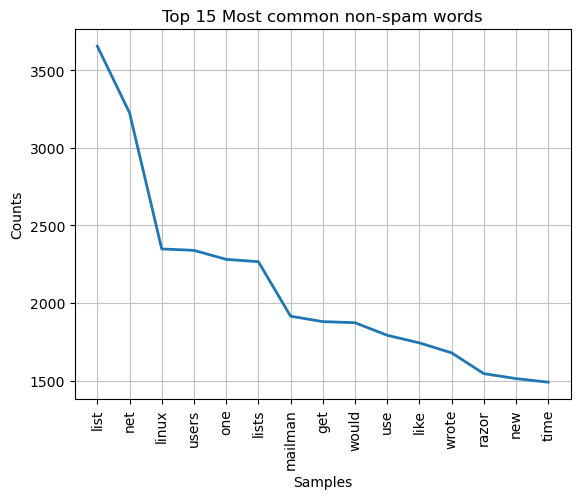

<Axes: title={'center': 'Top 15 Most common non-spam words'}, xlabel='Samples', ylabel='Counts'>

In [497]:
# Plot the top 15 most common non-spam words
nonspam_word.plot(15, title="Top 15 Most common non-spam words")

### Spam Words
---

In [23]:
# Generate a list of spam words
spam_word = []
for words in spam_amount:
    word_spam = word_tokenize(words)
    for w in word_spam:
        spam_word.append(w)
        
spam_word = nltk.FreqDist(spam_word)

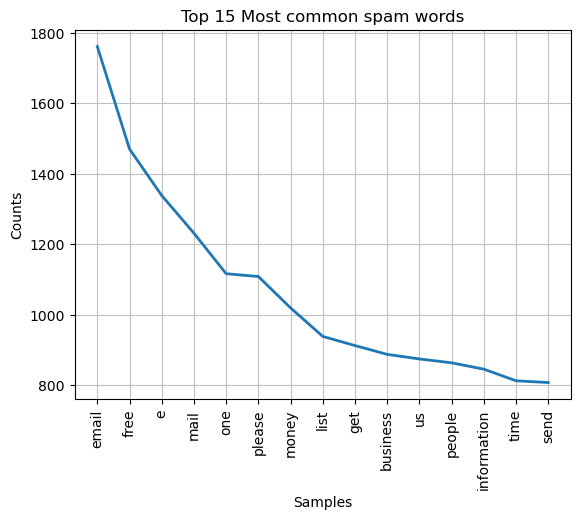

<Axes: title={'center': 'Top 15 Most common spam words'}, xlabel='Samples', ylabel='Counts'>

In [496]:
# Plot the top 15 most common spam words
spam_word.plot(15, title="Top 15 Most common spam words")

## Most common words with wordcloud
---

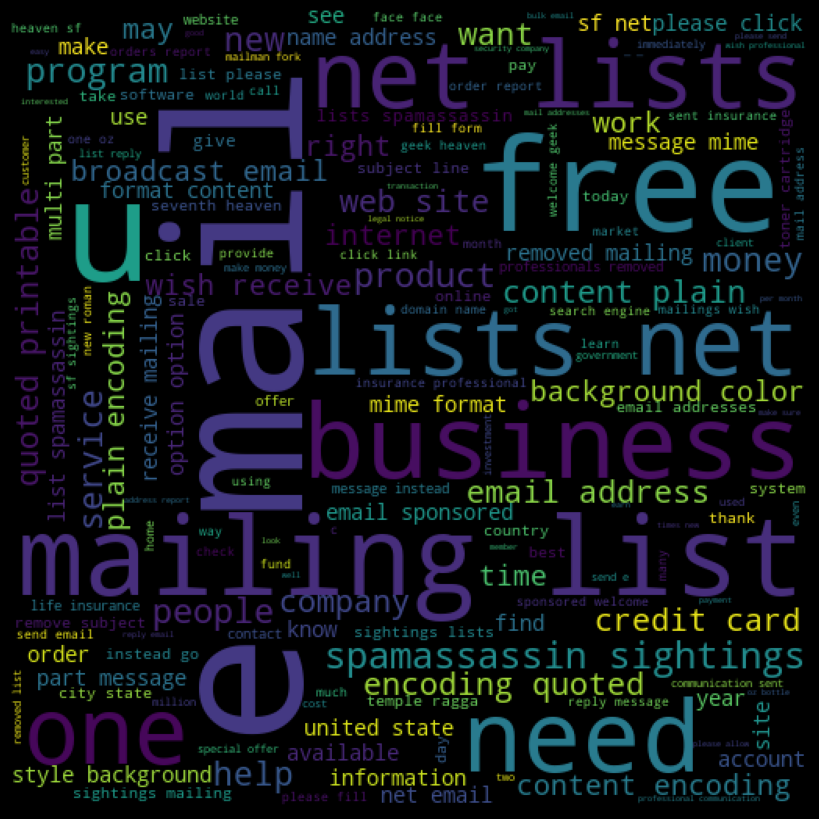

In [28]:
# Generate wordcloud for spam words
spam_words = " ".join(list(df[df["Type"] == "1"]["Message"]))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

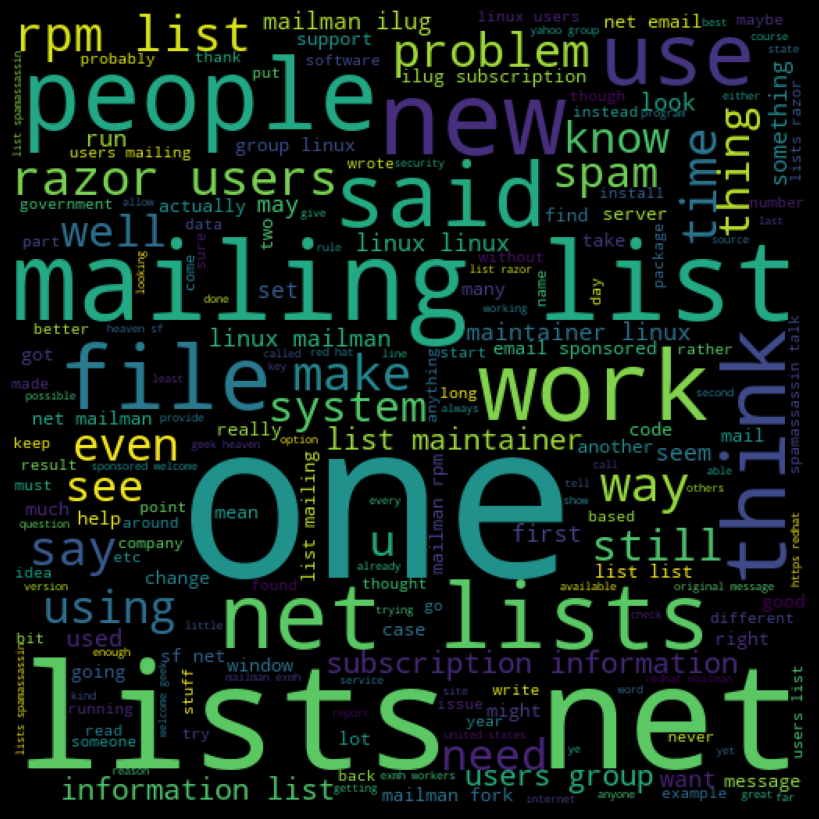

In [29]:
# Generate wordcloud for non-spam words
non_spam_words = " ".join(list(df[df["Type"] == "0"]["Message"]))
non_spam_wordcloud = WordCloud(width = 512, height = 512).generate(non_spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(non_spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Extracting Topics using Latent Dirichlet Allocation (LDA)
---

### Loading Dataset

In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import *
import numpy as np
import pandas as pd

In [31]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data[:]

,Type,Message,Length
0,1,dear homeowner interest rates lowest point yea...,340
1,1,attention must computer users new special pack...,653
2,1,multi part message mime format content plain e...,505
3,1,important information new domain names finally...,666
4,1,bottom line give away cd free people like one ...,903
...,...,...,...
5791,0,one working well week updates servers syncing ...,387
5792,0,morton quoted approves able say feeling times ...,96
5793,0,mon wrote correct lines added sources list rep...,184
5794,0,upon time wrote would like install rpm tried g...,672


### Further preprocessing the message

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [32]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

cleaned_data["Message"] = cleaned_data["Message"].astype(str)
# cleaned_data["Message"] = cleaned_data["Message"].apply(preprocess)

cleaned_data[:]

,Type,Message,Length
0,1,dear homeowner interest rates lowest point yea...,340
1,1,attention must computer users new special pack...,653
2,1,multi part message mime format content plain e...,505
3,1,important information new domain names finally...,666
4,1,bottom line give away cd free people like one ...,903
...,...,...,...
5791,0,one working well week updates servers syncing ...,387
5792,0,morton quoted approves able say feeling times ...,96
5793,0,mon wrote correct lines added sources list rep...,184
5794,0,upon time wrote would like install rpm tried g...,672


In [33]:
processed_docs = []

for doc in cleaned_data["Message"]:
    processed_docs.append(preprocess(doc))
    
print(processed_docs[:1])

cleaned_data['Message'] = processed_docs
cleaned_data["Length"] = cleaned_data["Message"].apply(len)

cleaned_data[:]

[['dear', 'homeown', 'rat', 'lowest', 'point', 'year', 'help', 'best', 'rate', 'situat', 'match', 'need', 'hundr', 'lender', 'home', 'improv', 'refin', 'second', 'mortgag', 'home', 'equiti', 'loan', 'perfect', 'credit', 'servic', 'free', 'home', 'owner', 'home', 'buyer', 'oblig', 'quick', 'simpl', 'form', 'jump', 'start', 'futur', 'plan', 'today', 'visit', 'unsubscrib', 'visit']]


,Type,Message,Length
0,1,"[dear, homeown, rat, lowest, point, year, help...",42
1,1,"[attent, user, special, packag, deal, systemwo...",73
2,1,"[multi, messag, mime, format, content, plain, ...",56
3,1,"[import, inform, domain, name, final, avail, g...",75
4,1,"[line, away, free, peopl, like, month, talk, a...",106
...,...,...,...
5791,0,"[work, week, updat, server, sync, origin, mess...",47
5792,0,"[morton, quot, approv, abl, feel, time, defini...",11
5793,0,"[write, correct, line, add, sourc, list, repos...",20
5794,0,"[time, write, like, instal, tri, inform, visit...",70


### Converting Spam Message to Bag of Words

In [34]:
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [35]:
# spam = cleaned_data[cleaned_data["Type"]==1]
# spam_msg = spam["Message"]

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Preview bow
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 250 ("contact") appears 1 time.
Word 506 ("copyright") appears 1 time.
Word 507 ("error") appears 1 time.
Word 508 ("feel") appears 1 time.
Word 509 ("longer") appears 1 time.


### Running LDA Model

In [36]:
# lda_model = gensim.models.LdaModel(bow_corpus, 
#                                    num_topics = 10, 
#                                    id2word = dictionary,                                    
#                                    passes = 50)


# num_topics = number of topics model should extract
# passes = number of times model should iterate (higher =  better results)
# workers = number of CPU cores
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 10)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"instal" + 0.012*"packag" + 0.010*"server" + 0.010*"version" + 0.009*"window" + 0.009*"code" + 0.008*"kernel" + 0.007*"run" + 0.007*"releas" + 0.007*"build"


Topic: 1 
Words: 0.025*"order" + 0.018*"report" + 0.015*"money" + 0.012*"program" + 0.011*"market" + 0.010*"internet" + 0.009*"million" + 0.008*"month" + 0.008*"life" + 0.008*"insur"


Topic: 2 
Words: 0.038*"razor" + 0.033*"spam" + 0.023*"spamassassin" + 0.017*"talk" + 0.012*"sight" + 0.010*"welcom" + 0.010*"geek" + 0.010*"heaven" + 0.009*"site" + 0.009*"server"


Topic: 3 
Words: 0.014*"money" + 0.013*"account" + 0.010*"secur" + 0.010*"govern" + 0.009*"fund" + 0.009*"credit" + 0.009*"countri" + 0.009*"transact" + 0.008*"contact" + 0.008*"bank"


Topic: 4 
Words: 0.014*"yahoo" + 0.009*"unsubscrib" + 0.008*"link" + 0.008*"women" + 0.006*"drive" + 0.006*"suppli" + 0.006*"month" + 0.006*"social" + 0.005*"lose" + 0.005*"admin"


Topic: 5 
Words: 0.052*"face" + 0.046*"style" + 0.038*"color" + 0.025*"folder" + 0

#### Manually Classifying Topics

Based on the words in each topic and their corresponding weights, determine its category:
- Topic 0: Software installation and version control
- Topic 1: Finance and business reports
- Topic 2: Email and server management
- Topic 3: Banking and financial transactions
- Topic 4: Email spam and subscriptions
- Topic 5: Graphic design and interface customization
- Topic 6: Government and economics
- Topic 7: Printer and cartridge supplies
- Topic 8: Technology and software development
- Topic 9: Language and semantics

### Saving Topics as Features

In [37]:
# Print the top 10 topics with their associated words and weights
topics = lda_model.print_topics(num_topics=10)

# Print each topic along with its associated words and weights
for topic in topics:
    print(topic)

(0, '0.016*"instal" + 0.012*"packag" + 0.010*"server" + 0.010*"version" + 0.009*"window" + 0.009*"code" + 0.008*"kernel" + 0.007*"run" + 0.007*"releas" + 0.007*"build"')
(1, '0.025*"order" + 0.018*"report" + 0.015*"money" + 0.012*"program" + 0.011*"market" + 0.010*"internet" + 0.009*"million" + 0.008*"month" + 0.008*"life" + 0.008*"insur"')
(2, '0.038*"razor" + 0.033*"spam" + 0.023*"spamassassin" + 0.017*"talk" + 0.012*"sight" + 0.010*"welcom" + 0.010*"geek" + 0.010*"heaven" + 0.009*"site" + 0.009*"server"')
(3, '0.014*"money" + 0.013*"account" + 0.010*"secur" + 0.010*"govern" + 0.009*"fund" + 0.009*"credit" + 0.009*"countri" + 0.009*"transact" + 0.008*"contact" + 0.008*"bank"')
(4, '0.014*"yahoo" + 0.009*"unsubscrib" + 0.008*"link" + 0.008*"women" + 0.006*"drive" + 0.006*"suppli" + 0.006*"month" + 0.006*"social" + 0.005*"lose" + 0.005*"admin"')
(5, '0.052*"face" + 0.046*"style" + 0.038*"color" + 0.025*"folder" + 0.017*"exmh" + 0.016*"size" + 0.014*"background" + 0.012*"invok" + 0.011*

In [57]:
# Assign the dominant topic to each document in the dataset
dominant_topics = []
topic_words = []  # New list to store topic words and weights

for i, text in enumerate(processed_docs):
    bow_vector = dictionary.doc2bow(text)
    topic_weights = lda_model.get_document_topics(bow_vector, minimum_probability=0.0)
    dominant_topic = sorted(topic_weights, key=lambda x: x[1], reverse=True)[0][0]
    dominant_topics.append(dominant_topic)
    topic_word_weights = lda_model.show_topic(dominant_topic)  # Get the topic word weights
    topic_words.append(topic_word_weights)
    
# Save the dominant topic as a separate feature in the dataset
cleaned_data['Topic'] = dominant_topics
cleaned_data['TopicWeights'] = topic_words

cleaned_data.to_csv('processed_data.csv', index=False)
cleaned_data[:]

,Type,Message,Length,Topic,TopicWeights
0,1,"['dear', 'homeown', 'rat', 'lowest', 'point', ...",42,3,"[(money, 0.014227422), (account, 0.013069613),..."
1,1,"['attent', 'user', 'special', 'packag', 'deal'...",73,5,"[(face, 0.05245895), (style, 0.045920994), (co..."
2,1,"['multi', 'messag', 'mime', 'format', 'content...",56,1,"[(order, 0.02458595), (report, 0.017936826), (..."
3,1,"['import', 'inform', 'domain', 'name', 'final'...",75,2,"[(razor, 0.037792183), (spam, 0.033013202), (s..."
4,1,"['line', 'away', 'free', 'peopl', 'like', 'mon...",106,1,"[(order, 0.02458595), (report, 0.017936826), (..."
...,...,...,...,...,...
5791,0,"['work', 'week', 'updat', 'server', 'sync', 'o...",47,2,"[(razor, 0.037792183), (spam, 0.033013202), (s..."
5792,0,"['morton', 'quot', 'approv', 'abl', 'feel', 't...",11,9,"[(mean, 0.005860126), (point, 0.0051698918), (..."
5793,0,"['write', 'correct', 'line', 'add', 'sourc', '...",20,0,"[(instal, 0.016436528), (packag, 0.012287928),..."
5794,0,"['time', 'write', 'like', 'instal', 'tri', 'in...",70,0,"[(instal, 0.016436528), (packag, 0.012287928),..."


## Training and Testing Different Models 
---

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
cleaned_data = pd.read_csv('processed_data.csv')
cleaned_data[:]

,Type,Message,Length,Topic
0,1,"['dear', 'homeown', 'rat', 'lowest', 'point', ...",42,3
1,1,"['attent', 'user', 'special', 'packag', 'deal'...",73,5
2,1,"['multi', 'messag', 'mime', 'format', 'content...",56,1
3,1,"['import', 'inform', 'domain', 'name', 'final'...",75,2
4,1,"['line', 'away', 'free', 'peopl', 'like', 'mon...",106,1
...,...,...,...,...
5791,0,"['work', 'week', 'updat', 'server', 'sync', 'o...",47,2
5792,0,"['morton', 'quot', 'approv', 'abl', 'feel', 't...",11,9
5793,0,"['write', 'correct', 'line', 'add', 'sourc', '...",20,0
5794,0,"['time', 'write', 'like', 'instal', 'tri', 'in...",70,0


In [41]:
X = cleaned_data['Message'].fillna(' ')  # message column
y = cleaned_data['Type'].fillna(' ')  # type column (spam/ham)

# split the data into training and testing sets with a 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# check the shapes of the resulting vectors
print("X_train shape:", X_train_vectorized.shape)
print("X_test shape:", X_test_vectorized.shape)

X_train shape: (4636, 15822)
X_test shape: (1160, 15822)


Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = nb.predict(X_test_vectorized)

# Evaluate Performance
bayes_accuracy = accuracy_score(y_test, y_pred)
bayes_precision = precision_score(y_test, y_pred)
bayes_recall = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", bayes_accuracy)
print("Precision:", bayes_precision)
print("Recall:", bayes_recall)
print("F1:", bayes_f1)

Accuracy: 0.9568965517241379
Precision: 0.9915254237288136
Recall: 0.8819095477386935
F1: 0.9335106382978724


Support Vector Machines | SVM

In [43]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = svm.predict(X_test_vectorized)

# Evaluate Performance
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1:", svm_f1)


Accuracy: 0.9758620689655172
Precision: 0.9842931937172775
Recall: 0.9447236180904522
F1: 0.9641025641025641


Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = rf.predict(X_test_vectorized)

# Evaluate Performance
forest_accuracy = accuracy_score(y_test, y_pred)
forest_precision = precision_score(y_test, y_pred)
forest_recall = recall_score(y_test, y_pred)
forest_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1:", forest_f1)

Accuracy: 0.9767241379310345
Precision: 0.9720101781170484
Recall: 0.9597989949748744
F1: 0.965865992414665


K-Nearest Neighbors | KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = knn.predict(X_test_vectorized)

# Evaluate Performance
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1:", knn_f1)

Accuracy: 0.9362068965517242
Precision: 0.8913043478260869
Recall: 0.9271356783919598
F1: 0.9088669950738916


Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = lr.predict(X_test_vectorized)

# Evaluate Performance
regression_accuracy = accuracy_score(y_test, y_pred)
regression_precision = precision_score(y_test, y_pred)
regression_recall = recall_score(y_test, y_pred)
regression_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", regression_accuracy)
print("Precision:", regression_precision)
print("Recall:", regression_recall)
print("F1:", regression_f1)

Accuracy: 0.968103448275862
Precision: 0.989159891598916
Recall: 0.9170854271356784
F1: 0.9517601043024773


<AxesSubplot:>

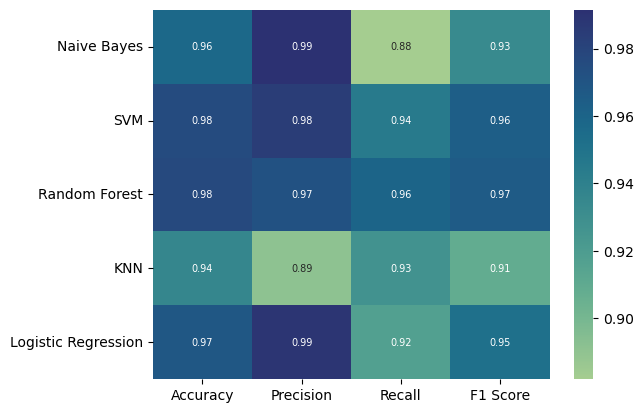

In [47]:
# Create heat map of results from the models above
data_results = [[bayes_accuracy, bayes_precision, bayes_recall, bayes_f1], 
                [svm_accuracy, svm_precision, svm_recall, svm_f1], 
                [forest_accuracy, forest_precision, forest_recall, forest_f1], 
                [knn_accuracy, knn_precision, knn_recall, knn_f1], 
                [regression_accuracy, regression_precision, regression_recall, regression_f1]]
df_heatmap = pd.DataFrame(data_results, columns=["Accuracy", "Precision", "Recall", "F1 Score"])
sns.heatmap(df_heatmap, annot=True, annot_kws={"size": 7}, yticklabels=["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"], cmap="crest")

In [48]:
# Save corresponding result measures within an array
accuracy_results = [bayes_accuracy, svm_accuracy, forest_accuracy, knn_accuracy, regression_accuracy]
precision_results = [bayes_precision, svm_precision, forest_precision, knn_precision, regression_precision]
recall_results = [bayes_recall, svm_recall, forest_recall, knn_recall, regression_recall]
f1_results = [bayes_f1, svm_f1, forest_f1, knn_f1, regression_f1]

In [49]:
# Save result measures for each corresponding model within an array
bayes = [bayes_accuracy, bayes_precision, bayes_recall, bayes_f1]
svm = [svm_accuracy, svm_precision, svm_recall, svm_f1]
forest = [forest_accuracy, forest_precision, forest_recall, forest_f1]
knn = [knn_accuracy, knn_precision, knn_recall, knn_f1]
regression = [regression_accuracy, regression_precision, regression_recall, regression_f1]

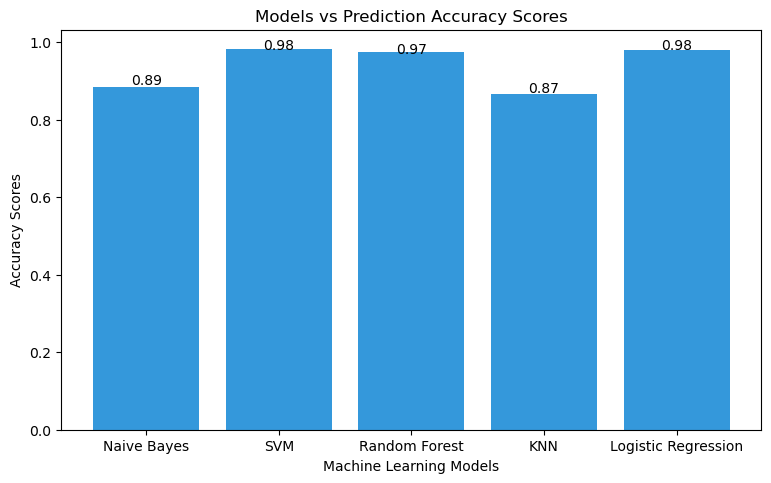

In [509]:
# Bar graph showing the accuracy results of each model
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_accuracy = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_accuracy.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(accuracy_results)), accuracy_results, color = ["#3498db"])
plt.title("Models vs Prediction Accuracy Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_accuracy, 2), round(bayes_accuracy, 2), ha = 'center')
plt.text(1, round(svm_accuracy, 2), round(svm_accuracy, 2), ha = 'center')
plt.text(2, round(forest_accuracy, 2), round(forest_accuracy, 2), ha = 'center')
plt.text(3, round(knn_accuracy, 2), round(knn_accuracy, 2), ha = 'center')
plt.text(4, round(regression_accuracy, 2), round(regression_accuracy, 2), ha = 'center')
plt.show()

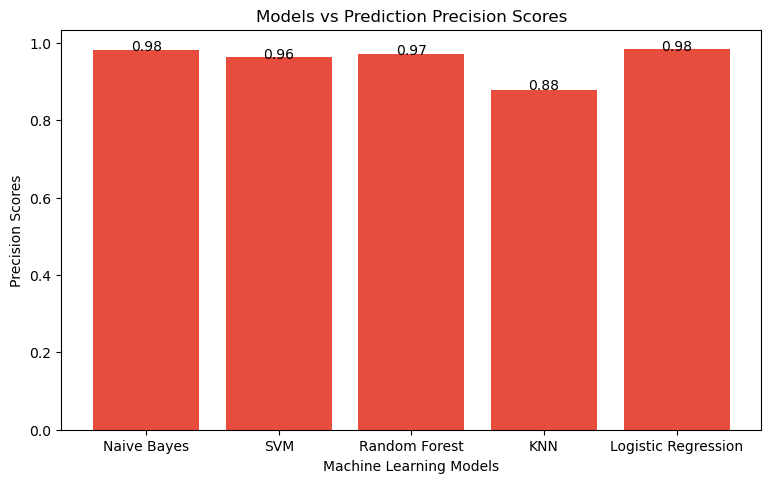

In [510]:
# Bar graph showing the precision results of each model
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_precision = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_precision.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(precision_results)), precision_results, color = ["#e74c3c"])
plt.title("Models vs Prediction Precision Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Precision Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_precision, 2), round(bayes_precision, 2), ha = 'center')
plt.text(1, round(svm_precision, 2), round(svm_precision, 2), ha = 'center')
plt.text(2, round(forest_precision, 2), round(forest_precision, 2), ha = 'center')
plt.text(3, round(knn_precision, 2), round(knn_precision, 2), ha = 'center')
plt.text(4, round(regression_precision, 2), round(regression_precision, 2), ha = 'center')
plt.show()

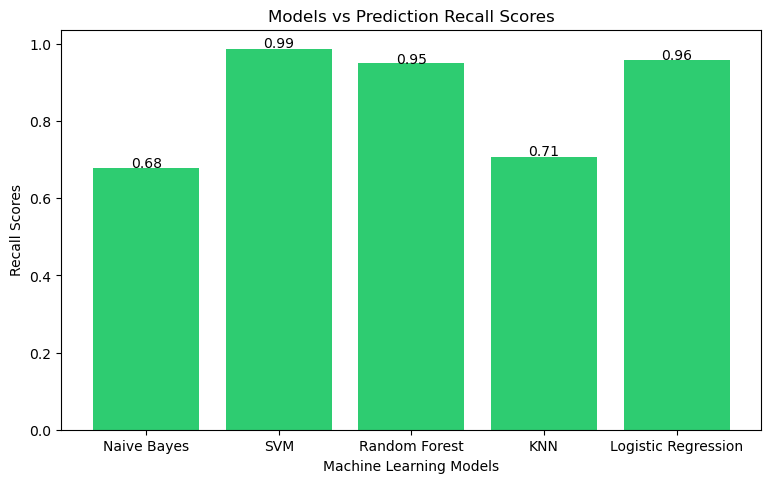

In [511]:
# Bar graph showing the recall results of each model
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_recall = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_recall.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(recall_results)), recall_results, color = ["#2ecc71"])
plt.title("Models vs Prediction Recall Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Recall Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_recall, 2), round(bayes_recall, 2), ha = 'center')
plt.text(1, round(svm_recall, 2), round(svm_recall, 2), ha = 'center')
plt.text(2, round(forest_recall, 2), round(forest_recall, 2), ha = 'center')
plt.text(3, round(knn_recall, 2), round(knn_recall, 2), ha = 'center')
plt.text(4, round(regression_recall, 2), round(regression_recall, 2), ha = 'center')
plt.show()

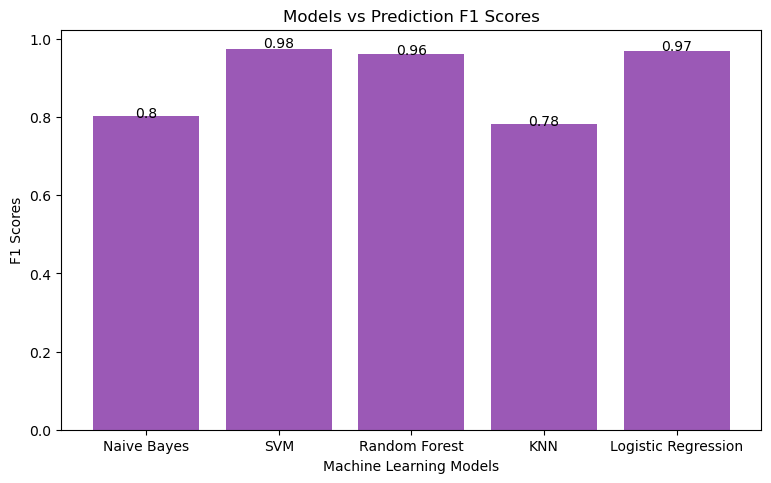

In [512]:
# Bar graph showing the f1 score results of each model
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_f1 = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_f1.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(f1_results)), f1_results, color = ["#9b59b6"])
plt.title("Models vs Prediction F1 Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("F1 Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_f1, 2), round(bayes_f1, 2), ha = 'center')
plt.text(1, round(svm_f1, 2), round(svm_f1, 2), ha = 'center')
plt.text(2, round(forest_f1, 2), round(forest_f1, 2), ha = 'center')
plt.text(3, round(knn_f1, 2), round(knn_f1, 2), ha = 'center')
plt.text(4, round(regression_f1, 2), round(regression_f1, 2), ha = 'center')
plt.show()